In [68]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Watertight Test

In [13]:
# checking if pix3d is watertight
def as_mesh(scene_or_mesh):
    """
    Convert a possible scene to a mesh.

    If conversion occurs, the returned mesh has only vertex and face data.
    """
    if isinstance(scene_or_mesh, trimesh.Scene):
        if len(scene_or_mesh.geometry) == 0:
            mesh = None  # empty scene
        else:
            # we lose texture information here
            mesh = trimesh.util.concatenate(
                tuple(trimesh.Trimesh(vertices=g.vertices, faces=g.faces)
                    for g in scene_or_mesh.geometry.values()))
    else:
        assert(isinstance(mesh, trimesh.Trimesh))
        mesh = scene_or_mesh
    return mesh
mesh_path = "../data/pix3d/model/chair/IKEA_BERNHARD/model.obj"
scene = trimesh.load_mesh(mesh_path, file_type='obj')
mesh = as_mesh(scene)
print(mesh.is_watertight)



False


# Check Pointcloud Alignment

In [ ]:
instances = []
instance_dir = "../data/ShapeNet/03001627/"
for root, dirs, files in os.walk(instance_dir):
    for d in dirs:
        if len(os.path.join(root,d).replace(instance_dir, "").split('/'))==1:
            instances.append(d)

<IPython.core.display.Javascript object>


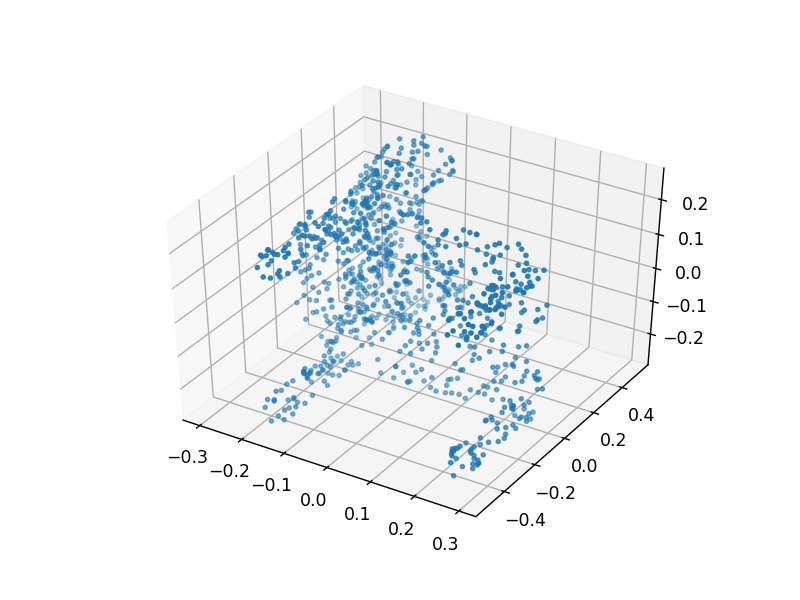

<IPython.core.display.Javascript object>


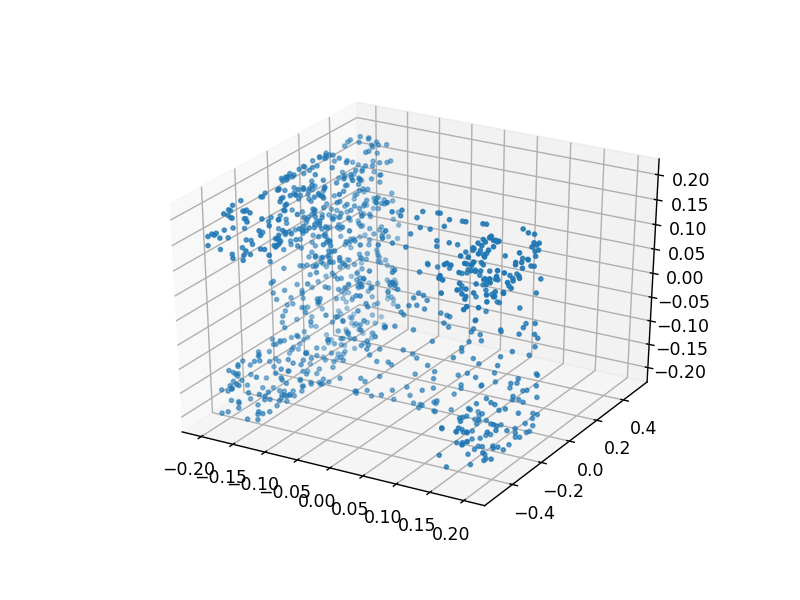

<IPython.core.display.Javascript object>


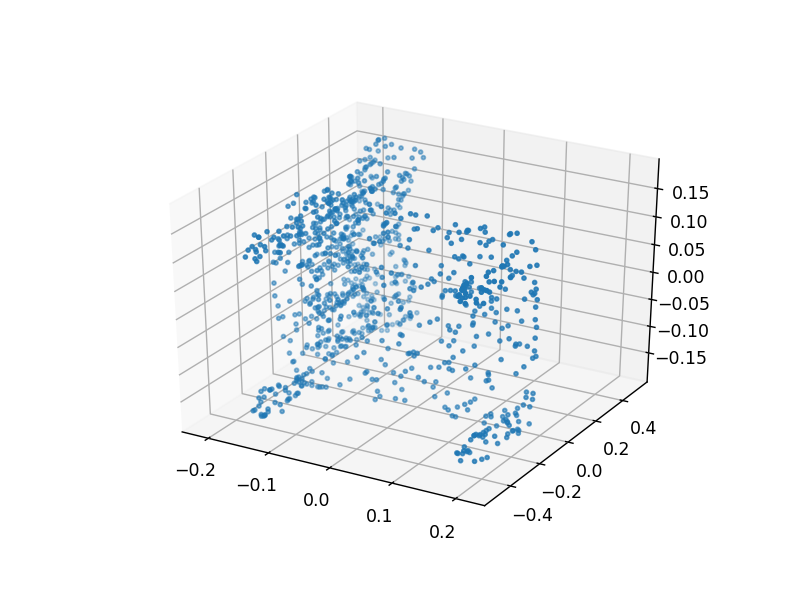

<IPython.core.display.Javascript object>


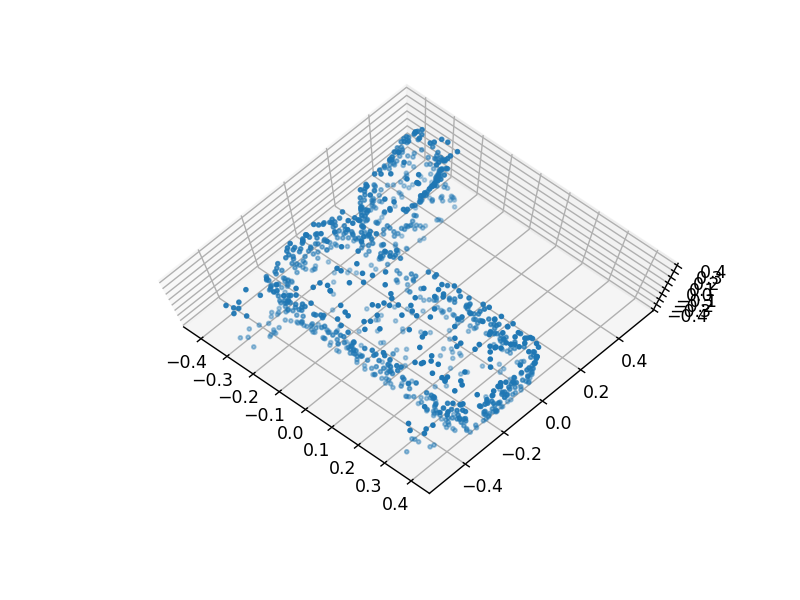

<IPython.core.display.Javascript object>


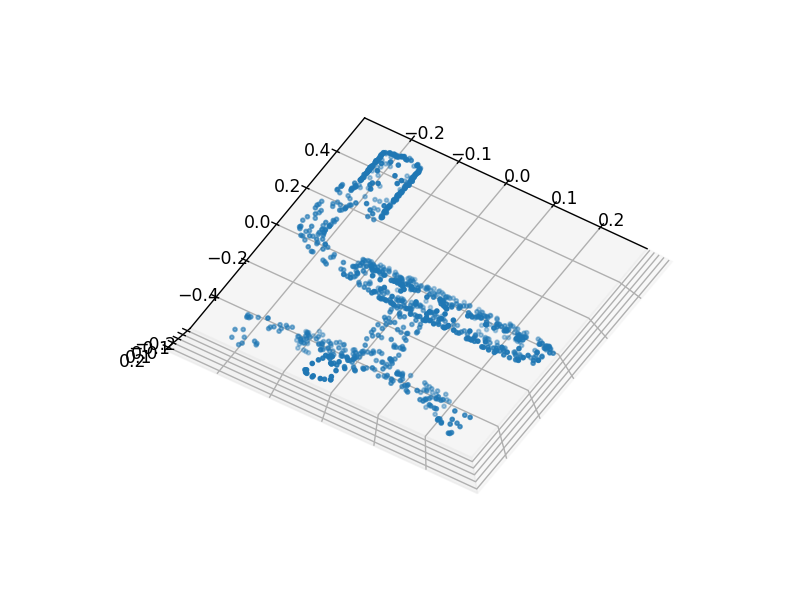

<IPython.core.display.Javascript object>


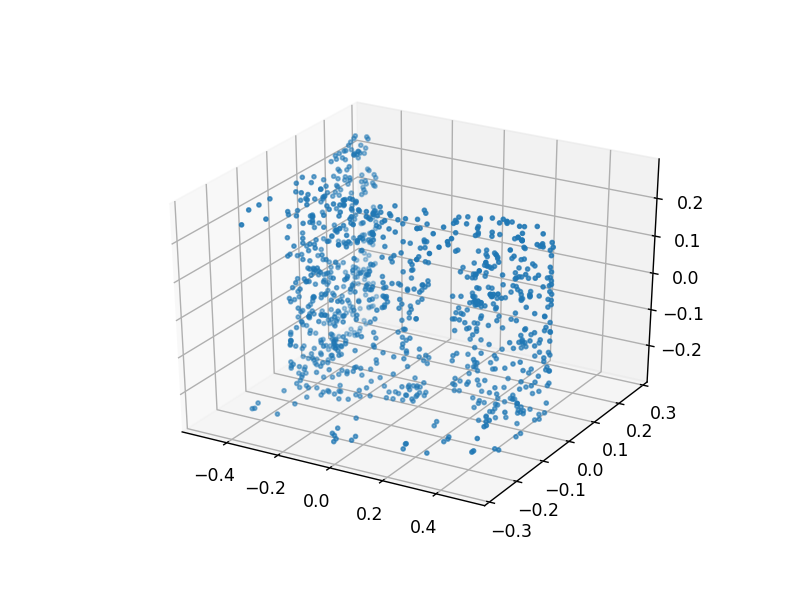

<IPython.core.display.Javascript object>


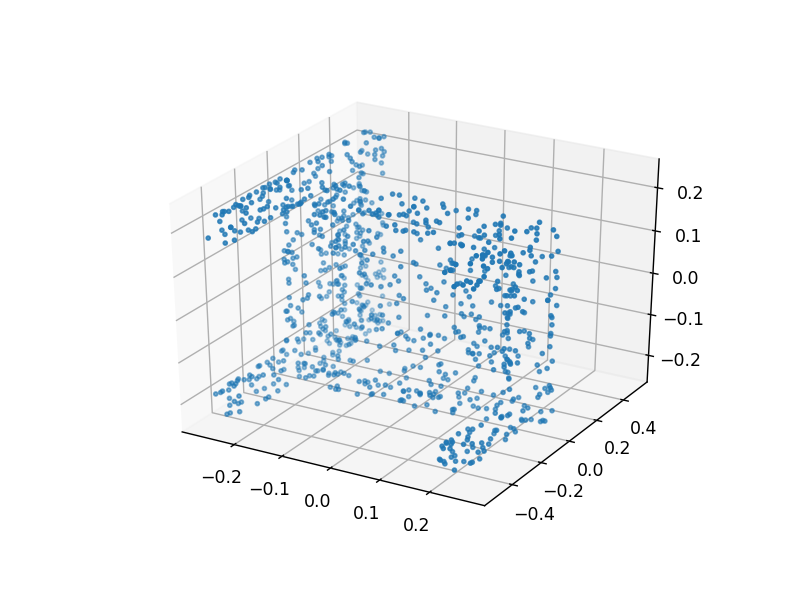

<IPython.core.display.Javascript object>


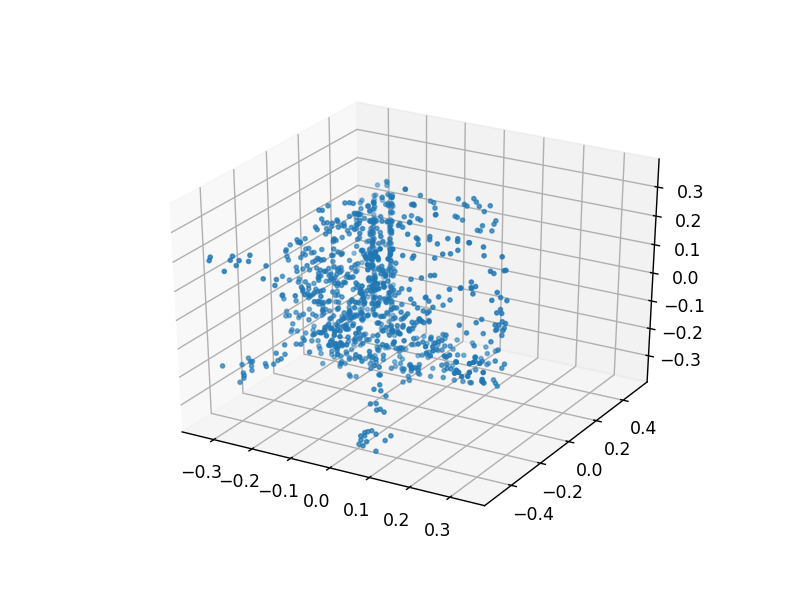

<IPython.core.display.Javascript object>


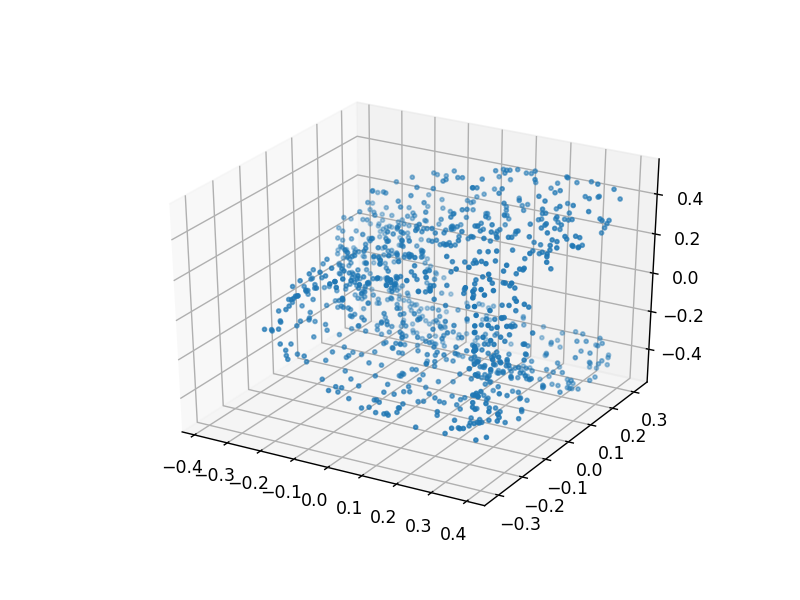

<IPython.core.display.Javascript object>


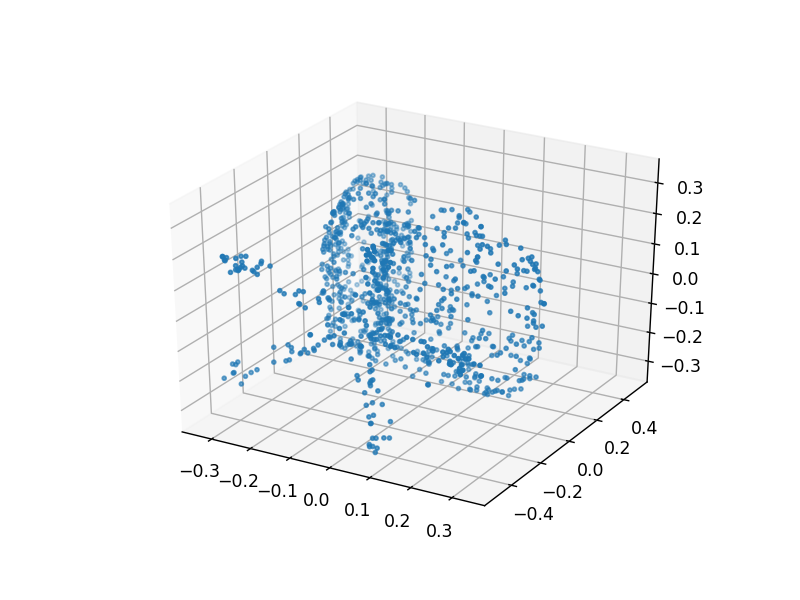

<IPython.core.display.Javascript object>


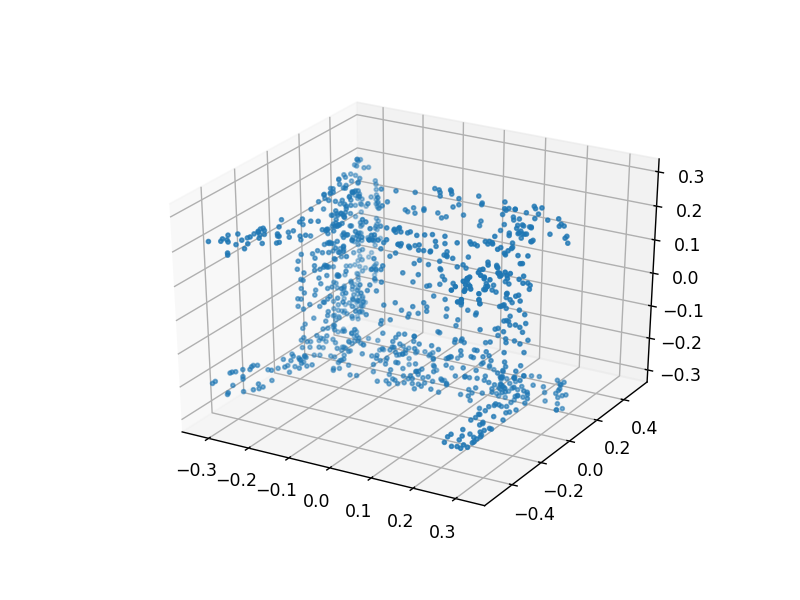

<IPython.core.display.Javascript object>


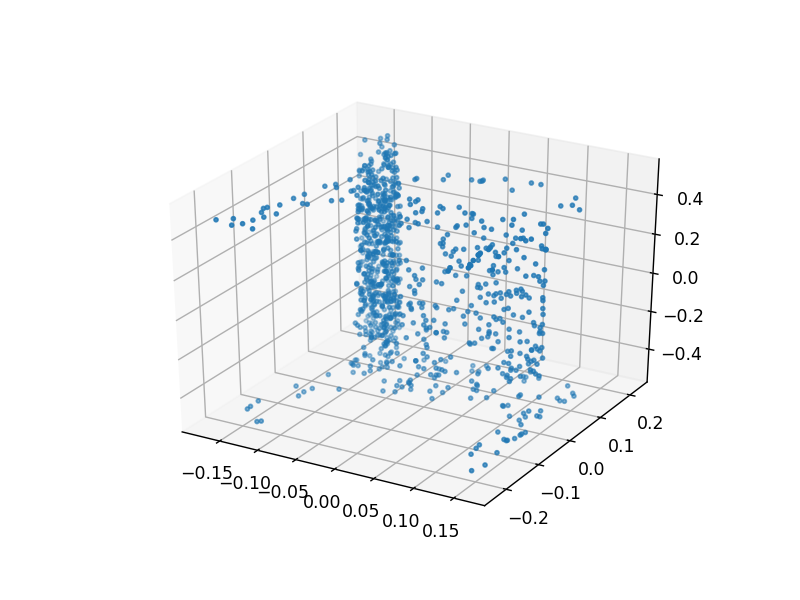

<IPython.core.display.Javascript object>


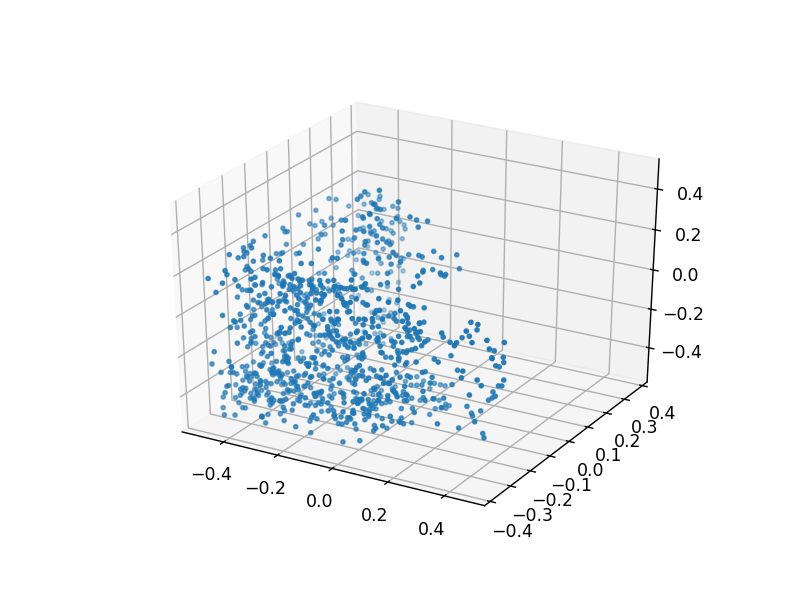

<IPython.core.display.Javascript object>


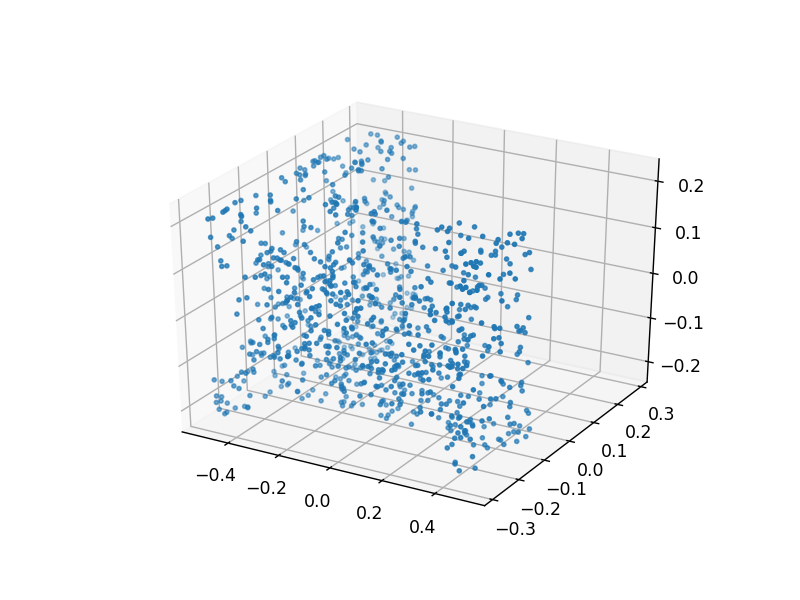

<IPython.core.display.Javascript object>


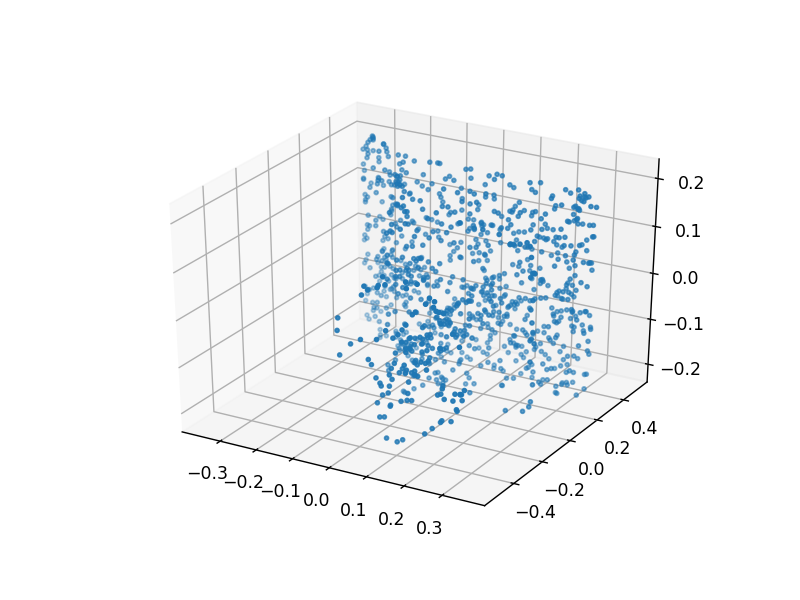

In [69]:
n_instances = 15

for instance in random.sample(instances, n_instances):

    shape_dir = "../data/ShapeNet/03001627/"+instance
    pointcloud_path = os.path.join(shape_dir, "pointcloud.npz")
    pointcloud_info = np.load(pointcloud_path)
    pointcloud = pointcloud_info['points']
    n_points_sample = 1000
    pointcloud = pointcloud[np.random.choice(pointcloud.shape[0], n_points_sample)]


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = pointcloud[:,0]
    y = pointcloud[:,1]
    z = pointcloud[:,2]
    ax.scatter(x,y,z, marker = '.')